## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.io import savemat, loadmat
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [2]:
# load file dataset
folder = '../mat_files/5/'
filename = 'dataset6Output.mat'
dataset = loadmat(folder+filename)

In [3]:
print(dataset['label'])
dataset = dataset['dataset']

['dataset untuk proses klasifikasi 6 output']


In [4]:
dataset.shape

(360, 12, 10)

In [5]:
# load file target
folder = '../mat_files/5/'
filename = 'target-6Out.mat'
target = loadmat(folder+filename)

print(target['label'])
target = target['target'][0]
#print(target)

['target 6 kelas untuk proses klasifikasi']


In [6]:
# mengubah type data target menjadi int
int_array = target.astype(int)
target = int_array

In [7]:
nsamples, nx, ny = dataset.shape
print(nsamples, nx, ny)
D2_dataset = dataset.reshape((nsamples,nx*ny))
D2_dataset.shape

360 12 10


(360, 120)

In [8]:
print(f'Dimensi data set: {D2_dataset.shape}')
print(f'Class: {set(target)}')

Dimensi data set: (360, 120)
Class: {0, 1, 2, 3, 4, 5}


## normalisasi

In [9]:
scaler = preprocessing.normalize(D2_dataset)

## simulasi random state pada train_test_split

In [10]:
# RS = np.arange(1,100,1)

# train_results = []
# test_results = []

# for i in range(len(RS)): 
#     x_train, x_test, y_train, y_test = train_test_split(D2_dataset,
#                                                         target,
#                                                         test_size=0.2,
#                                                         random_state= i)
#     model = RandomForestClassifier(random_state = 0)
#     model.fit(x_train,y_train)
#     #Prediksi nilai y dari data train
#     y_predt = model.predict(x_train)
#     #Prediksi nilai y dari data test
#     y_pred = model.predict(x_test)
    
#     train_acc = model.score(x_train,y_train)
#     train_results.append(train_acc)
    
#     test_acc = model.score(x_test,y_test)
#     test_results.append(test_acc)
#     print(i)
#     print(f'Final Training Accuracy: {model.score(x_train,y_train)*100}%')
#     print(f'Model Accuracy: {model.score(x_test,y_test)*100}%')
    
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# len(RS)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(scaler,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=12)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(288, 120) (72, 120) (288,) (72,)


In [12]:
model = RandomForestClassifier(max_features = 'sqrt',
                               max_depth = 6,  
                               n_estimators = 200, 
                               min_samples_leaf = 2, 
                               min_samples_split = 5,
                               random_state = 49,
                               )
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=49)

In [13]:
#Prediksi nilai dari data train
y_predt = model.predict(x_train)
#Prediksi nilai  dari data test
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import classification_report
# print(classification_report(y_train, y_predt))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.82      0.69      0.75        13
           2       0.64      0.70      0.67        10
           3       0.75      0.60      0.67        10
           4       0.88      1.00      0.94        15
           5       0.83      0.83      0.83        12

    accuracy                           0.81        72
   macro avg       0.79      0.79      0.79        72
weighted avg       0.80      0.81      0.80        72



In [15]:
print(f'Final Training Accuracy: {model.score(x_train,y_train)*100}%')
print(f'Model Accuracy: {model.score(x_test,y_test)*100}%')

Final Training Accuracy: 98.26388888888889%
Model Accuracy: 80.55555555555556%


In [16]:
Nilai_Akurasi = accuracy_score(y_test, y_pred)*100
Nilai_Sensitifitas = recall_score(y_test, y_pred, average='macro')*100
Nilai_Presisi = precision_score(y_test, y_pred, average='macro')*100

print(Nilai_Akurasi)
print(Nilai_Sensitifitas)
print(Nilai_Presisi)

80.55555555555556
79.03846153846153
79.43975958681841


In [17]:
Nilai_Sensitifitas_None = recall_score(y_test, y_pred, average=None)*100
Nilai_Presisi_None = precision_score(y_test, y_pred, average=None)*100

print(Nilai_Sensitifitas_None)
print(Nilai_Presisi_None)

[ 91.66666667  69.23076923  70.          60.         100.
  83.33333333]
[84.61538462 81.81818182 63.63636364 75.         88.23529412 83.33333333]


In [18]:
# print(confusion_matrix(y_train, y_predt))
# print(confusion_matrix(y_test, y_pred))

Text(33.0, 0.5, 'Nilai Aktual ')

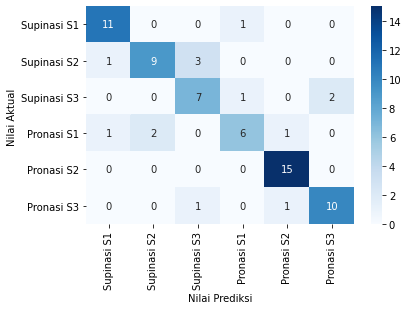

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',
                xticklabels=['Supinasi S1','Supinasi S2','Supinasi S3',
                             'Pronasi S1','Pronasi S2','Pronasi S3'],
                yticklabels=['Supinasi S1','Supinasi S2','Supinasi S3',
                             'Pronasi S1','Pronasi S2','Pronasi S3'])
ax.set_xlabel('Nilai Prediksi')
ax.set_ylabel('Nilai Aktual ')

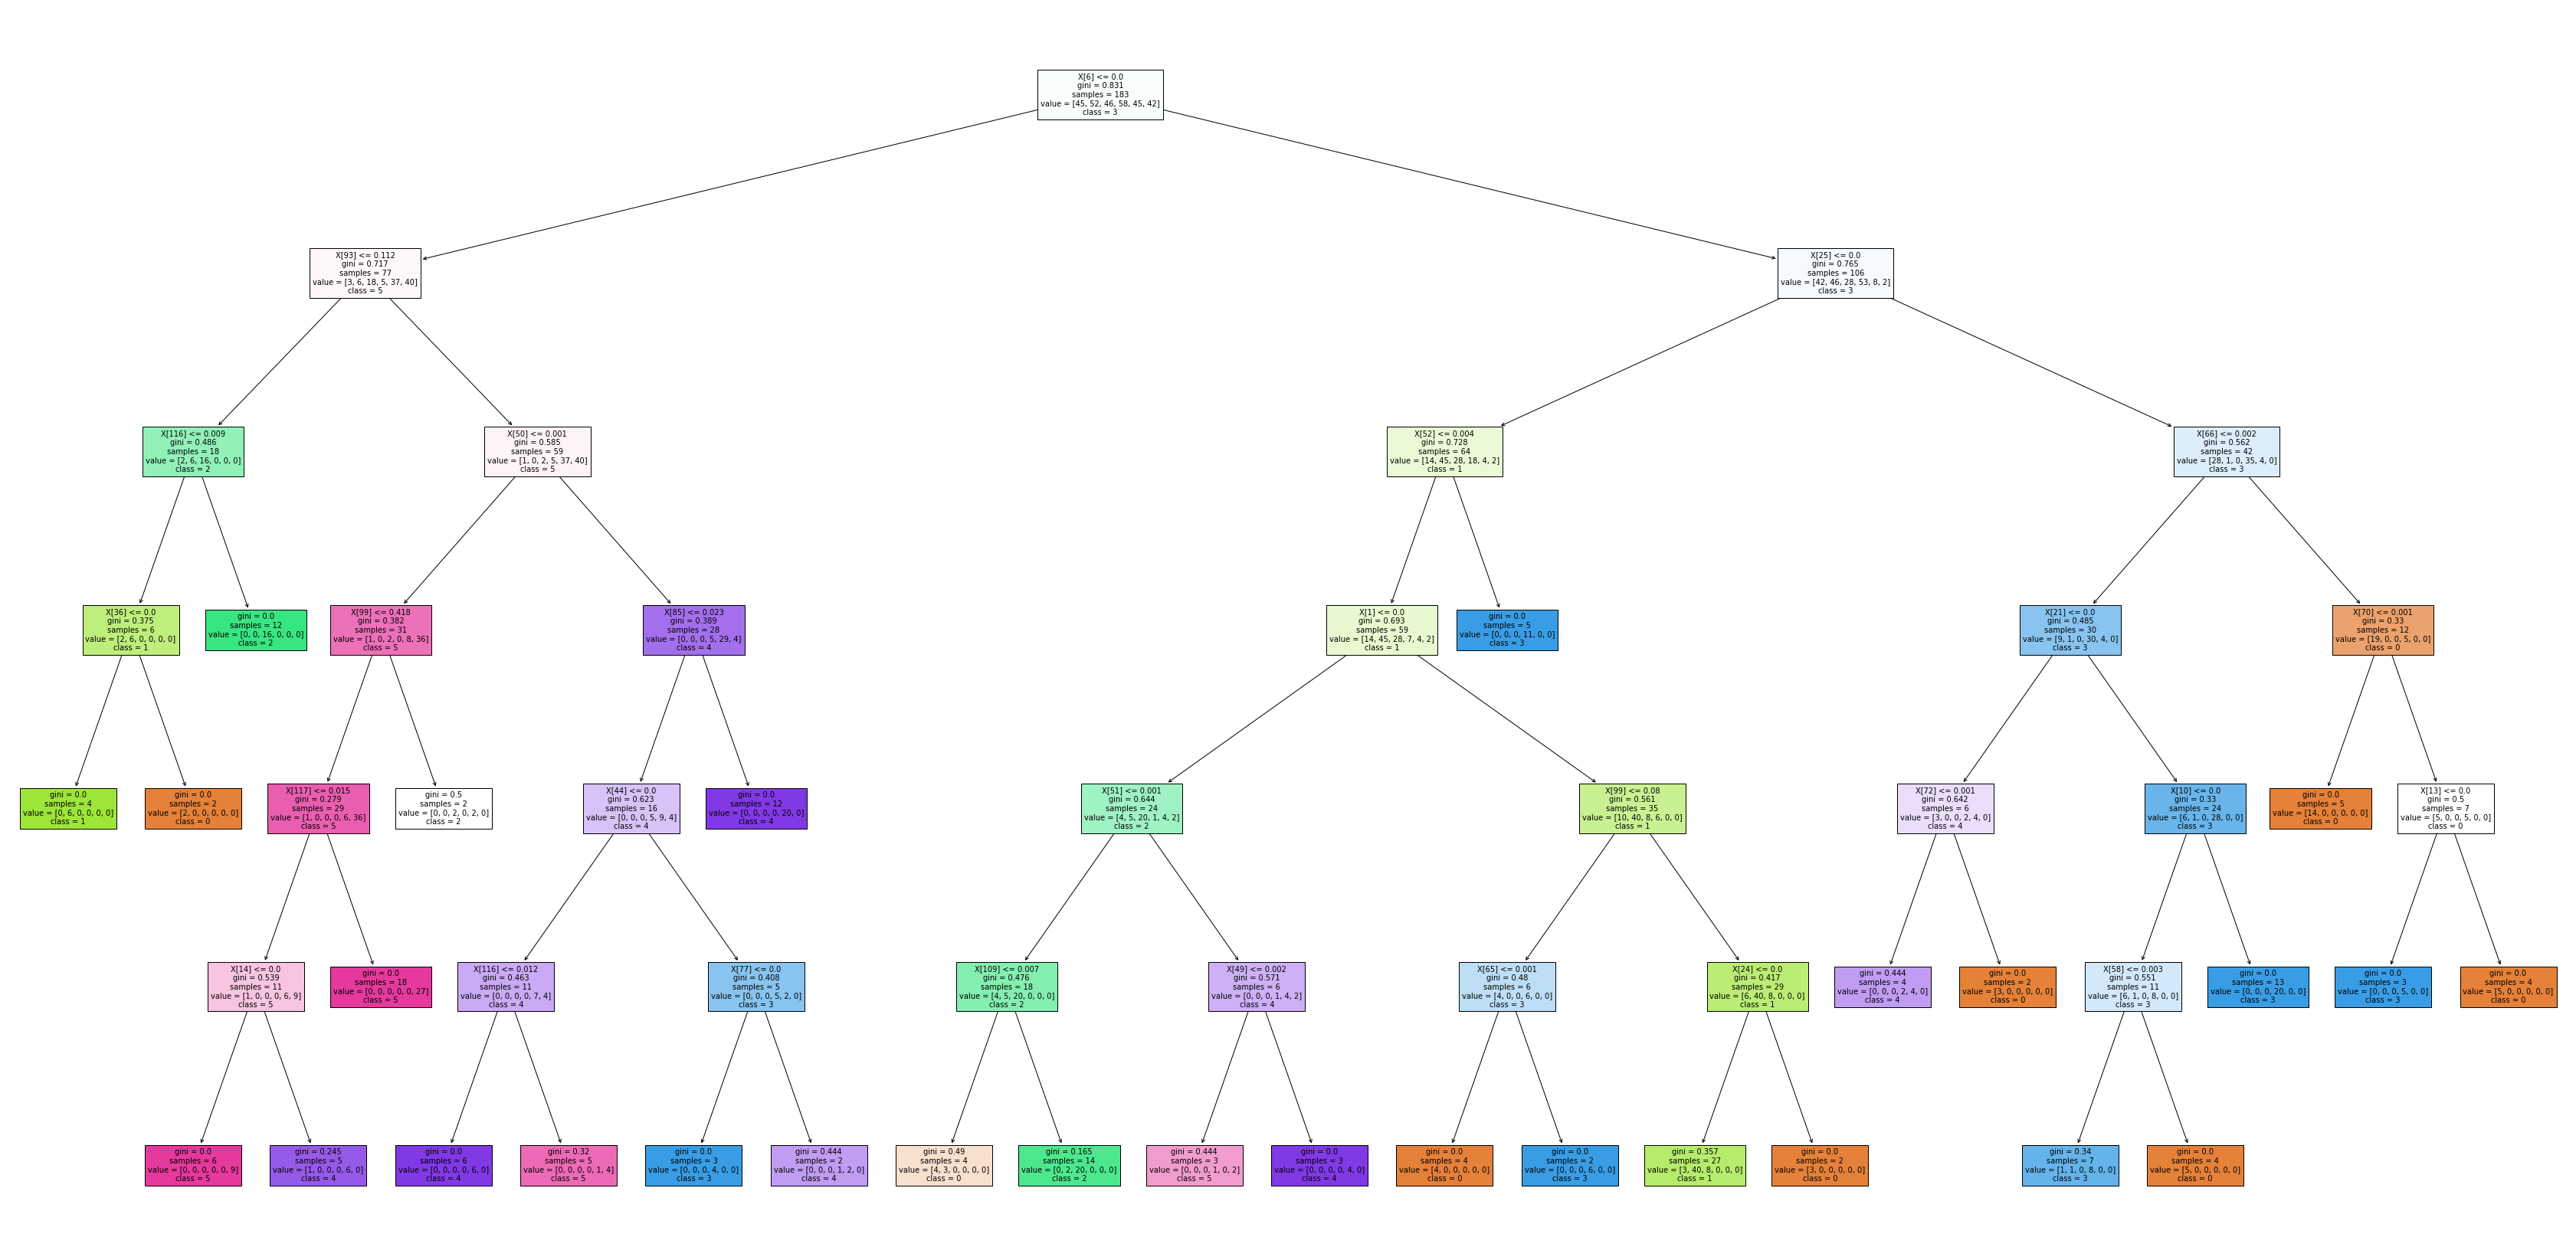

In [22]:
from sklearn import tree
plt.figure(figsize = [60,30])
tree.plot_tree(model.estimators_[1],class_names = ('0','1','2','3','4','5'),filled=True);

## tunning

1
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
2
Final Training Accuracy: 100.0%
Model Accuracy: 77.77777777777779%
 
3
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
4
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
5
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
6
Final Training Accuracy: 100.0%
Model Accuracy: 86.11111111111111%
 
7
Final Training Accuracy: 100.0%
Model Accuracy: 79.16666666666666%
 
8
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
9
Final Training Accuracy: 100.0%
Model Accuracy: 79.16666666666666%
 
10
Final Training Accuracy: 100.0%
Model Accuracy: 79.16666666666666%
 
11
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
12
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
13
Final Training Accuracy: 100.0%
Model Accuracy: 83.33333333333334%
 
14
Final Training Accuracy: 100.0%
Model Accuracy: 77.77777777777779%
 
1

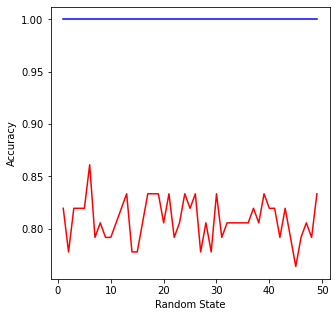

In [21]:
random_state = np.arange(1,50,1)
train_results = []
test_results = []

for random in random_state:
    rf = RandomForestClassifier(random_state = random)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(random)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(random_state, train_results, "b", label="Train AUC")
line2, = plt.plot(random_state, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("Random State")
plt.show()

100
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
150
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
200
Final Training Accuracy: 100.0%
Model Accuracy: 83.33333333333334%
 
250
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
300
Final Training Accuracy: 100.0%
Model Accuracy: 83.33333333333334%
 
350
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
400
Final Training Accuracy: 100.0%
Model Accuracy: 83.33333333333334%
 
450
Final Training Accuracy: 100.0%
Model Accuracy: 83.33333333333334%
 


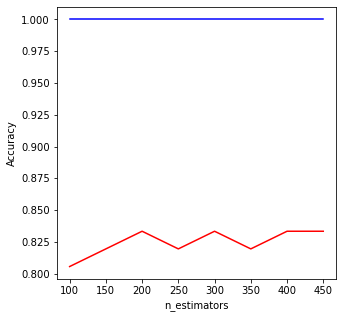

In [22]:
n_estimators = np.arange(100,500,50)
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(estimator)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

sqrt
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
log2
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 


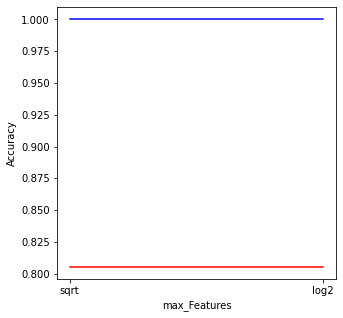

In [23]:
max_features = ['sqrt', 'log2']
train_results = []
test_results = []

for maxFeatures in max_features:
    rf = RandomForestClassifier(max_features = maxFeatures, random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(maxFeatures)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("max_Features")
plt.show()

4
Final Training Accuracy: 89.93055555555556%
Model Accuracy: 75.0%
 
5
Final Training Accuracy: 96.52777777777779%
Model Accuracy: 77.77777777777779%
 
6
Final Training Accuracy: 98.61111111111111%
Model Accuracy: 83.33333333333334%
 


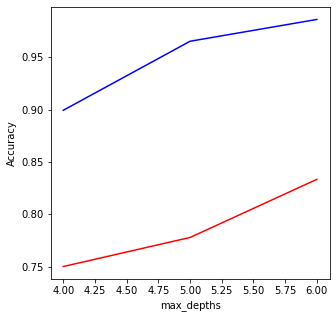

In [24]:
max_depth = [4, 5, 6]
train_results = []
test_results = []

for maxDepths in max_depth:
    rf = RandomForestClassifier(max_depth = maxDepths , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(maxDepths)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(max_depth, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depth, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("max_depths")
plt.show()

1
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
2
Final Training Accuracy: 99.30555555555556%
Model Accuracy: 81.94444444444444%
 
3
Final Training Accuracy: 97.91666666666666%
Model Accuracy: 79.16666666666666%
 
4
Final Training Accuracy: 96.52777777777779%
Model Accuracy: 79.16666666666666%
 
5
Final Training Accuracy: 93.05555555555556%
Model Accuracy: 77.77777777777779%
 
6
Final Training Accuracy: 92.70833333333334%
Model Accuracy: 76.38888888888889%
 
7
Final Training Accuracy: 89.93055555555556%
Model Accuracy: 73.61111111111111%
 
8
Final Training Accuracy: 88.54166666666666%
Model Accuracy: 66.66666666666666%
 
9
Final Training Accuracy: 86.80555555555556%
Model Accuracy: 72.22222222222221%
 


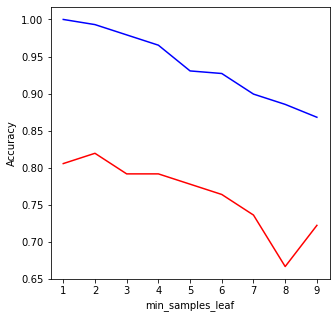

In [25]:
min_samples_leaf = np.arange(1,10,1)
train_results = []
test_results = []

for minSampleLeaf in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf = minSampleLeaf , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(minSampleLeaf)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(min_samples_leaf, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leaf, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.show()

2
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
3
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
4
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
5
Final Training Accuracy: 100.0%
Model Accuracy: 81.94444444444444%
 
6
Final Training Accuracy: 100.0%
Model Accuracy: 80.55555555555556%
 
7
Final Training Accuracy: 99.65277777777779%
Model Accuracy: 81.94444444444444%
 
8
Final Training Accuracy: 99.30555555555556%
Model Accuracy: 80.55555555555556%
 
9
Final Training Accuracy: 98.61111111111111%
Model Accuracy: 79.16666666666666%
 


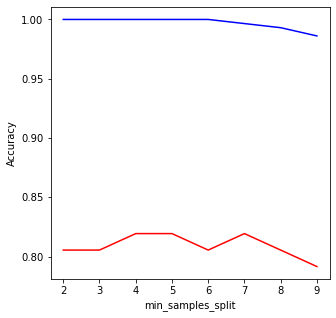

In [26]:
min_samples_split = np.arange(2,10,1)
train_results = []
test_results = []

for minSampleSplit in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = minSampleSplit , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(minSampleSplit)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(min_samples_split, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_split, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.show()